<a href="https://colab.research.google.com/github/Daramluv/Google_colab/blob/main/Optimizing_Decision_Tree_Models1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [ ]:
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Train Data Shape: (36268, 371)
Test Data Shape: (39053, 370)


In [ ]:
print(train_data.head())
print(train_data.describe())

   ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                      0.0                      0.0  ...

In [ ]:
print("Missing values in train data:\n", train_data.isnull().sum())
print("Missing values in test data:\n", test_data.isnull().sum())

Missing values in train data:
 ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    1
saldo_medio_var44_ult1     1
saldo_medio_var44_ult3     1
var38                      1
TARGET                     1
Length: 371, dtype: int64
Missing values in test data:
 ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace2    1
saldo_medio_var44_hace3    1
saldo_medio_var44_ult1     1
saldo_medio_var44_ult3     1
var38                      1
Length: 370, dtype: int64


In [ ]:
print(train_data.columns)

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)


In [ ]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [ ]:
print("Missing values in train data:\n", train_data.isnull().sum())
print("Missing values in test data:\n", test_data.isnull().sum())

Missing values in train data:
 ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64
Missing values in test data:
 ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace2    0
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
Length: 370, dtype: int64


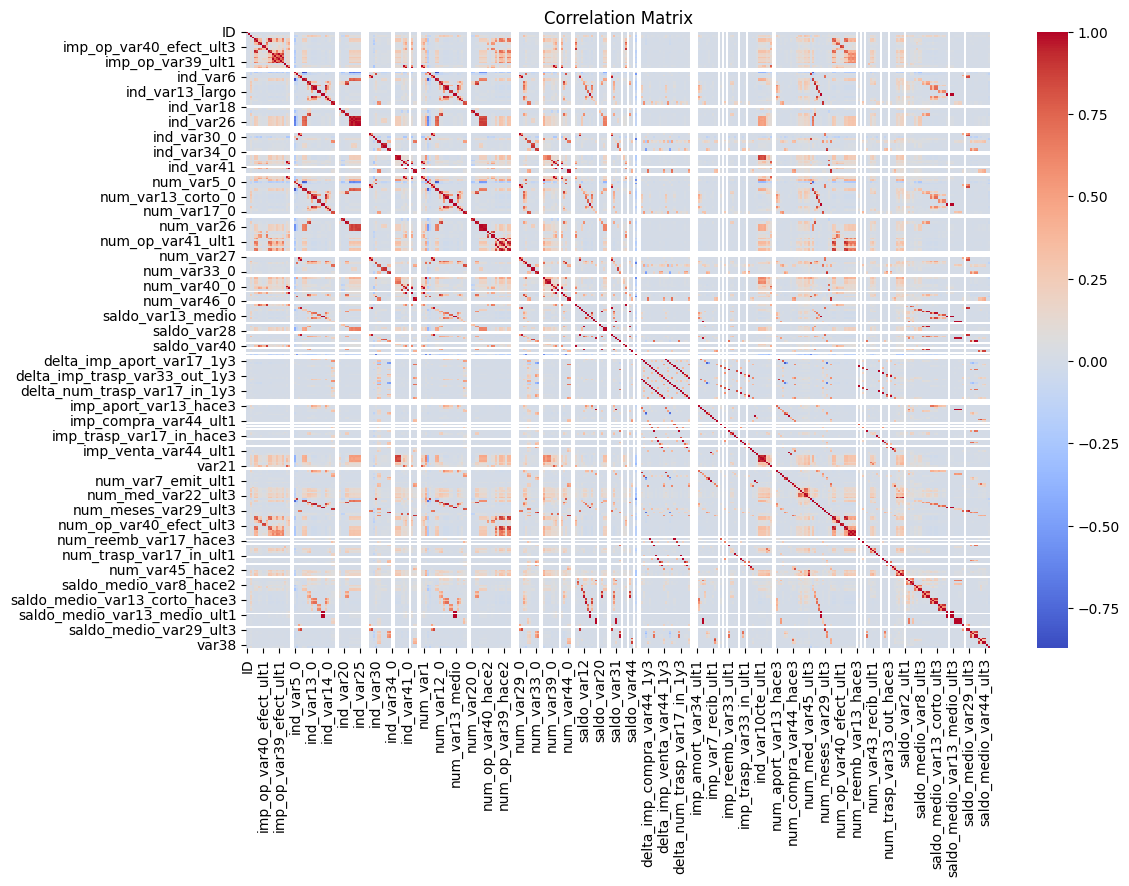

In [ ]:
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Calculate correlation with the 'TARGET' variable
target_correlation = correlation_matrix["TARGET"]

# Extract the names of features with NaN correlation values
irrelevant_features = target_correlation[target_correlation.isna()].index.tolist()

# Drop features with NaN correlation values from the training and testing data
train_data_cleaned = train_data.drop(columns=irrelevant_features)
test_data_cleaned = test_data.drop(columns=irrelevant_features)

# Print the removed irrelevant features
print("Removed irrelevant features:", irrelevant_features)

Removed irrelevant features: ['ind_var2_0', 'ind_var2', 'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var34_0', 'ind_var34', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var18_0', 'num_var18', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var18', 'saldo_var28', 'saldo_var27', 'saldo_var34', 'saldo_var41', 'saldo_var46', 'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3', 'imp_amort_var18_hace3', 'imp_amort_var18_ult1', 'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_reemb_var13_hace3', 'imp_reemb_var17_hace3', 'imp_reemb_var33_hace3', 'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3', 'num_reemb_var17_hace3', 'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 'saldo_medio_var13_medio_hace3', 'saldo_medio_var29_hace3']


In [ ]:
# Recalculate correlation matrix on the cleaned training data
correlation_matrix_cleaned = train_data_cleaned.corr()

# Calculate correlation with 'TARGET' again after cleaning
target_correlation_cleaned = correlation_matrix_cleaned["TARGET"].sort_values()

# Display the lowest and highest correlations with TARGET after cleaning, excluding TARGET itself
print(target_correlation_cleaned.drop("TARGET").head(3))  # Top 3 features with low correlation
print(target_correlation_cleaned.drop("TARGET").tail(3))  # Top 3 features with high correlation

ind_var30             -0.140608
num_meses_var5_ult3   -0.139417
num_var30             -0.131447
Name: TARGET, dtype: float64
ind_var8_0    0.039202
var15         0.095292
var36         0.097414
Name: TARGET, dtype: float64


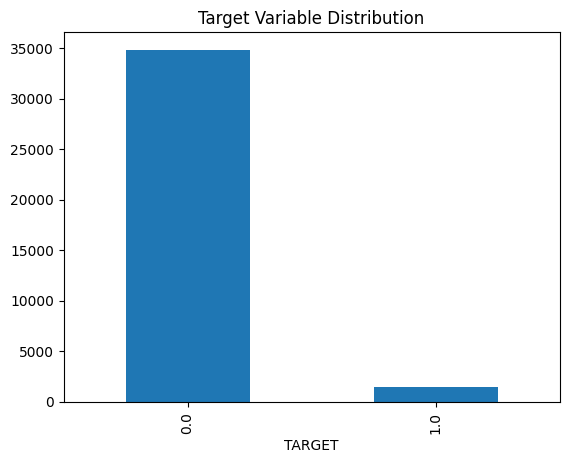

In [ ]:
train_data['TARGET'].value_counts().plot(kind='bar', title='Target Variable Distribution')
plt.show()

In [ ]:
# Separate features and target variable from training data
X = train_data.drop(columns=['TARGET', 'ID'])  # Drop TARGET and ID columns from features
y = train_data['TARGET']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize Decision Tree Classifier with class weights to handle imbalance
model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Model 1: Default parameters
model_1 = DecisionTreeClassifier(random_state=42)
model_1.fit(X_train, y_train)
predictions_1 = model_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, predictions_1)
print("Model 1 (Default parameters) Accuracy:", accuracy_1)

# Model 2: Limit max depth to 5
model_2 = DecisionTreeClassifier(max_depth=5, random_state=42)
model_2.fit(X_train, y_train)
predictions_2 = model_2.predict(X_test)
accuracy_2 = accuracy_score(y_test, predictions_2)
print("Model 2 (Max Depth = 5) Accuracy:", accuracy_2)

# Model 3: Use 'entropy' criterion and limit max leaf nodes to 10
model_3 = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=42)
model_3.fit(X_train, y_train)
predictions_3 = model_3.predict(X_test)
accuracy_3 = accuracy_score(y_test, predictions_3)
print("Model 3 (Criterion = 'entropy', Max Leaf Nodes = 10) Accuracy:", accuracy_3)

# Summary of model accuracies
print("\nSummary of Model Accuracies:")
print(f"Model 1 (Default): {accuracy_1}")
print(f"Model 2 (Max Depth=5): {accuracy_2}")
print(f"Model 3 (Entropy, Max Leaf Nodes=10): {accuracy_3}")

Model 1 (Default parameters) Accuracy: 0.9288668320926385
Model 2 (Max Depth = 5) Accuracy: 0.9614006065618969
Model 3 (Criterion = 'entropy', Max Leaf Nodes = 10) Accuracy: 0.9615384615384616

Summary of Model Accuracies:
Model 1 (Default): 0.9288668320926385
Model 2 (Max Depth=5): 0.9614006065618969
Model 3 (Entropy, Max Leaf Nodes=10): 0.9615384615384616


In [ ]:
X_test = X_test[X_train.columns]

In [ ]:

# Find columns that are in X_train but not in X_test
missing_cols_in_test = set(X_train.columns) - set(X_test.columns)
print("Columns in X_train but not in X_test:", missing_cols_in_test)

# Find columns that are in X_test but not in X_train
missing_cols_in_train = set(X_test.columns) - set(X_train.columns)
print("Columns in X_test but not in X_train:", missing_cols_in_train)

Columns in X_train but not in X_test: set()
Columns in X_test but not in X_train: set()


In [ ]:
model1 = DecisionTreeClassifier(max_depth=3, random_state=42)
model1.fit(X_train, y_train)

model2 = DecisionTreeClassifier(max_depth=5, random_state=42)
model2.fit(X_train, y_train)

model3 = DecisionTreeClassifier(max_depth=7, random_state=42)
model3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [ ]:
# Find the common columns between train_data and test_data
common_columns = train_data.columns.intersection(test_data.columns).drop('ID')

# Create X_test with only the common columns
X_test = test_data[common_columns]

In [ ]:
predictions1 = model1.predict(X_test)
predictions2 = model2.predict(X_test)
predictions3 = model3.predict(X_test)

print("Length of test_ids:", len(test_ids))
print("Length of predictions1:", len(predictions1))

Length of test_ids: 39052
Length of predictions1: 39052


In [ ]:
output1 = pd.DataFrame({'ID': test_ids, 'TARGET': predictions1})
output1.to_csv('model1_predictions.csv', index=False)

output2 = pd.DataFrame({'ID': test_ids, 'TARGET': predictions2})
output2.to_csv('model2_predictions.csv', index=False)

output3 = pd.DataFrame({'ID': test_ids, 'TARGET': predictions3})
output3.to_csv('model3_predictions.csv', index=False)

In [ ]:
# 모델로 예측 생성
predictions = model1.predict(X_test)

# 예측 결과를 CSV 파일로 저장
output = pd.DataFrame({'ID': test_ids, 'TARGET': predictions})
output.to_csv('model1_predictions.csv', index=False)